<a href="https://colab.research.google.com/github/fer1tx/data-analyst-and-ml-works/blob/main/full_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o global-food-prices.zip https://www.kaggle.com/api/v1/datasets/download/adrianjuliusaluoch/global-food-prices

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28.6M  100 28.6M    0     0  49.7M      0 --:--:-- --:--:-- --:--:-- 49.7M


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile("/content/global-food-prices.zip","r") as f:
  f.extractall()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Global WFP Food Prices.csv")

In [ ]:
df.head()

,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21
2,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33
3,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20
4,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22


In [ ]:
df.drop(['market','commodity','currency','local_price'],axis=1,inplace=True)

In [ ]:
df

,country_code,date,county,subcounty,market_id,latitude,longitude,category,commodity_id,unit,price_flag,price_type,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,266,37.12,70.58,non-food,465,Day,actual,Retail,3205.81000
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,267,36.73,67.11,non-food,465,Day,actual,Retail,2137.21000
2,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,55,KG,actual,Retail,0.33000
3,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,84,KG,actual,Retail,0.20000
4,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,58,KG,actual,Retail,0.22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109612,ZWE,2025-03-15,Mashonaland Central,Shamva,8824,-17.30,31.57,non-food,539,100 ML,aggregate,Retail,0.00060
3109613,ZWE,2025-03-15,Masvingo,Chiredzi Urban,5532,-21.05,31.67,miscellaneous food,185,KG,aggregate,Retail,0.00047
3109614,ZWE,2025-03-15,Masvingo,Chiredzi Urban,5532,-21.05,31.67,non-food,540,KG,aggregate,Retail,0.00065
3109615,ZWE,2025-03-15,Matabeleland South,Insiza,5474,-20.46,29.61,"meat, fish and eggs",887,KG,aggregate,Retail,0.00600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109617 entries, 0 to 3109616
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   country_code  object 
 1   date          object 
 2   county        object 
 3   subcounty     object 
 4   market_id     int64  
 5   latitude      float64
 6   longitude     float64
 7   category      object 
 8   commodity_id  int64  
 9   unit          object 
 10  price_flag    object 
 11  price_type    object 
 12  price_usd     float64
dtypes: float64(3), int64(2), object(8)
memory usage: 308.4+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109617 entries, 0 to 3109616
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   country_code  object        
 1   date          datetime64[ns]
 2   county        object        
 3   subcounty     object        
 4   market_id     int64         
 5   latitude      float64       
 6   longitude     float64       
 7   category      object        
 8   commodity_id  int64         
 9   unit          object        
 10  price_flag    object        
 11  price_type    object        
 12  price_usd     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 308.4+ MB


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df

,country_code,date,county,subcounty,market_id,latitude,longitude,category,commodity_id,unit,price_flag,price_type,price_usd,year,month,day
0,AFG,2000-01-15,Badakhshan,Faiz Abad,266,37.12,70.58,non-food,465,Day,actual,Retail,3205.81000,2000,1,15
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,267,36.73,67.11,non-food,465,Day,actual,Retail,2137.21000,2000,1,15
2,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,55,KG,actual,Retail,0.33000,2000,1,15
3,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,84,KG,actual,Retail,0.20000,2000,1,15
4,AFG,2000-01-15,Hirat,Hirat,270,34.35,62.20,cereals and tubers,58,KG,actual,Retail,0.22000,2000,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109612,ZWE,2025-03-15,Mashonaland Central,Shamva,8824,-17.30,31.57,non-food,539,100 ML,aggregate,Retail,0.00060,2025,3,15
3109613,ZWE,2025-03-15,Masvingo,Chiredzi Urban,5532,-21.05,31.67,miscellaneous food,185,KG,aggregate,Retail,0.00047,2025,3,15
3109614,ZWE,2025-03-15,Masvingo,Chiredzi Urban,5532,-21.05,31.67,non-food,540,KG,aggregate,Retail,0.00065,2025,3,15
3109615,ZWE,2025-03-15,Matabeleland South,Insiza,5474,-20.46,29.61,"meat, fish and eggs",887,KG,aggregate,Retail,0.00600,2025,3,15


In [ ]:
df.drop(['date'],axis=1,inplace=True)

In [ ]:
df

,country_code,county,subcounty,market_id,latitude,longitude,category,commodity_id,unit,price_flag,price_type,price_usd,year,month,day
0,AFG,Badakhshan,Faiz Abad,266,37.12,70.58,non-food,465,Day,actual,Retail,3205.81000,2000,1,15
1,AFG,Balkh,Mazar-e-Sharif,267,36.73,67.11,non-food,465,Day,actual,Retail,2137.21000,2000,1,15
2,AFG,Hirat,Hirat,270,34.35,62.20,cereals and tubers,55,KG,actual,Retail,0.33000,2000,1,15
3,AFG,Hirat,Hirat,270,34.35,62.20,cereals and tubers,84,KG,actual,Retail,0.20000,2000,1,15
4,AFG,Hirat,Hirat,270,34.35,62.20,cereals and tubers,58,KG,actual,Retail,0.22000,2000,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109612,ZWE,Mashonaland Central,Shamva,8824,-17.30,31.57,non-food,539,100 ML,aggregate,Retail,0.00060,2025,3,15
3109613,ZWE,Masvingo,Chiredzi Urban,5532,-21.05,31.67,miscellaneous food,185,KG,aggregate,Retail,0.00047,2025,3,15
3109614,ZWE,Masvingo,Chiredzi Urban,5532,-21.05,31.67,non-food,540,KG,aggregate,Retail,0.00065,2025,3,15
3109615,ZWE,Matabeleland South,Insiza,5474,-20.46,29.61,"meat, fish and eggs",887,KG,aggregate,Retail,0.00600,2025,3,15


In [ ]:
df.drop(['subcounty','county'],axis=1,inplace=True)

In [ ]:
df

,country_code,market_id,latitude,longitude,category,commodity_id,unit,price_flag,price_type,price_usd,year,month,day
0,AFG,266,37.12,70.58,non-food,465,Day,actual,Retail,3205.81000,2000,1,15
1,AFG,267,36.73,67.11,non-food,465,Day,actual,Retail,2137.21000,2000,1,15
2,AFG,270,34.35,62.20,cereals and tubers,55,KG,actual,Retail,0.33000,2000,1,15
3,AFG,270,34.35,62.20,cereals and tubers,84,KG,actual,Retail,0.20000,2000,1,15
4,AFG,270,34.35,62.20,cereals and tubers,58,KG,actual,Retail,0.22000,2000,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109612,ZWE,8824,-17.30,31.57,non-food,539,100 ML,aggregate,Retail,0.00060,2025,3,15
3109613,ZWE,5532,-21.05,31.67,miscellaneous food,185,KG,aggregate,Retail,0.00047,2025,3,15
3109614,ZWE,5532,-21.05,31.67,non-food,540,KG,aggregate,Retail,0.00065,2025,3,15
3109615,ZWE,5474,-20.46,29.61,"meat, fish and eggs",887,KG,aggregate,Retail,0.00600,2025,3,15


In [ ]:
import matplotlib.pyplot as plt

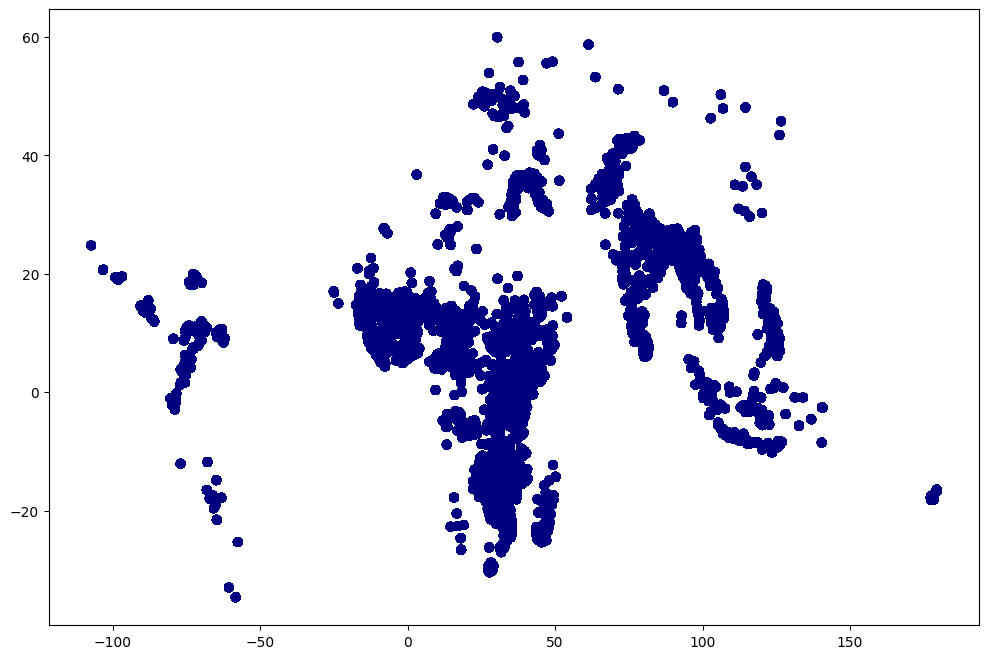

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(
    x = df['longitude'],
    y = df['latitude'],
    c = df['price_usd'],
    cmap = 'jet'

)

In [ ]:
if df['price_usd'].isna().sum() > 0:
  df.dropna(subset=['price_usd'],inplace=True)

In [ ]:
df.isna().sum()

,0
country_code,0
market_id,0
latitude,21390
longitude,21390
category,0
commodity_id,0
unit,0
price_flag,0
price_type,0
price_usd,0


In [ ]:
X = df.drop(['price_usd'],axis=1)
y = df['price_usd'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
import numpy as np
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
num_features

Index(['market_id', 'latitude', 'longitude', 'commodity_id', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
cat_features

Index(['country_code', 'category', 'unit', 'price_flag', 'price_type'], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler # -- standatization
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
cat_pipeline = Pipeline ([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False))
])

num_pipeline = Pipeline ([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler()) # min - max scaler  --- normalization
])

In [ ]:
transformer = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
],remainder='passthrough')

In [ ]:
full_pipeline_lr = Pipeline ([

    ('prepocessing', transformer),
    ('estimator',LinearRegression())

])

In [ ]:
full_pipeline_lr.fit(X_train,y_train)

In [ ]:
print(f"train score: {full_pipeline_lr.score(X_train,y_train)}\ntest score : {full_pipeline_lr.score(X_test,y_test)}")